In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
X[:5]

array([[0.03618152],
       [1.99308901],
       [0.15140169],
       [1.74246996],
       [1.08894737]])

In [4]:
y[:5]

array([[ 4.4621089 ],
       [10.24477313],
       [ 5.55012414],
       [ 8.29700642],
       [ 7.73882303]])

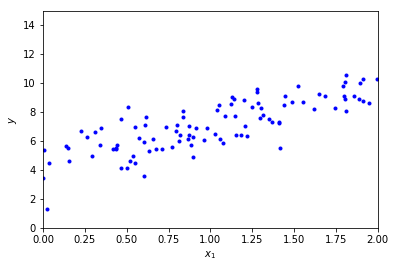

In [8]:
plt.plot(X, y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression Model
$ \hat{\theta} = \left(\mathbf{X}^T\cdot\mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot y$

In [10]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
X_b = np.c_[np.ones((100,1)),X]

In [12]:
X_b[:5]

array([[1.        , 0.03618152],
       [1.        , 1.99308901],
       [1.        , 0.15140169],
       [1.        , 1.74246996],
       [1.        , 1.08894737]])

In [13]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.04507408, -0.03523264],
       [-0.03523264,  0.03539191]])

In [17]:
theta_best

array([[4.44804804],
       [2.6386619 ]])

In [18]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

print(X_new)

[[0]
 [2]]


In [19]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [20]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.44804804],
       [9.72537183]])

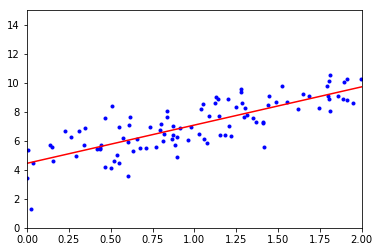

In [21]:
plt.plot(X, y,'b.')
plt.plot(X_new, y_predict, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_,lm.coef_)

[4.44804804] [[2.6386619]]


In [23]:
lm.predict(X_new)

array([[4.44804804],
       [9.72537183]])

# Linear Regression using batch gradient descent

In [24]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

In [25]:
theta

array([[4.44804804],
       [2.6386619 ]])

In [26]:
X_new_b.dot(theta)

array([[4.44804804],
       [9.72537183]])

In [34]:
theta_path_bgd = []

def plot_gd(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for i in range(n_iterations):
        if i<10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient
        
        if i%100 ==0:
            print(gradient, theta)
        
        if theta_path is not None:
            theta_path.append(theta)
     
    plt.xlabel('$x_1$')
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta))
    
    print('----------------------------------')
    print()
    

[[-7.48535867]
 [-8.58782379]] [[2.85655701]
 [0.79988918]]
[[ 9.11422342e-05]
 [-2.02895054e-03]] [[4.45182589]
 [2.63495149]]
[[ 0.00062246]
 [-0.00054303]] [[4.45039506]
 [2.63661526]]
[[ 0.00036678]
 [-0.00031983]] [[4.44943074]
 [2.6374562 ]]
[[ 0.00021608]
 [-0.00018842]] [[4.44886261]
 [2.6379516 ]]
[[ 0.00012729]
 [-0.000111  ]] [[4.44852792]
 [2.63824344]]
[[ 7.49920221e-05]
 [-6.53924687e-05]] [[4.44833075]
 [2.63841538]]
[[ 4.41793134e-05]
 [-3.85240228e-05]] [[4.44821459]
 [2.63851667]]
[[ 2.60269249e-05]
 [-2.26952791e-05]] [[4.44814616]
 [2.63857634]]
[[ 1.53329866e-05]
 [-1.33702469e-05]] [[4.44810585]
 [2.63861149]]
----------------------------------

[[-7.48535867]
 [-8.58782379]] [[3.45538571]
 [1.48691509]]
[[ 0.00012372]
 [-0.00010789]] [[4.44850457]
 [2.63826381]]
[[ 8.53334806e-06]
 [-7.44101412e-06]] [[4.44807953]
 [2.63863444]]
[[ 5.88549982e-07]
 [-5.13211074e-07]] [[4.44805021]
 [2.63866   ]]
[[ 4.05926341e-08]
 [-3.53964669e-08]] [[4.44804819]
 [2.63866177]]


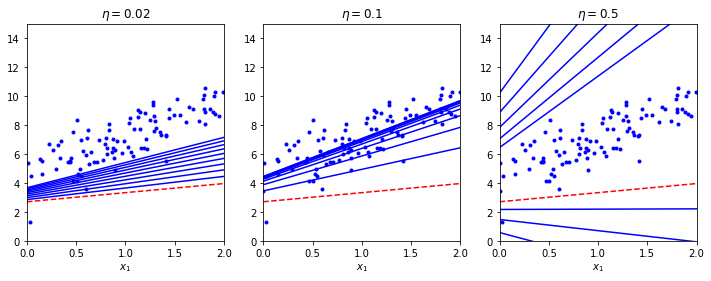

In [35]:
np.random.seed(101)
theta = np.random.randn(2,1)

plt.figure(figsize=(12,4))
plt.subplot(131)
plot_gd(theta, eta=0.02)
plt.subplot(132)
plot_gd(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gd(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

In [37]:
theta_path_sgd = []
m = len(X_b)


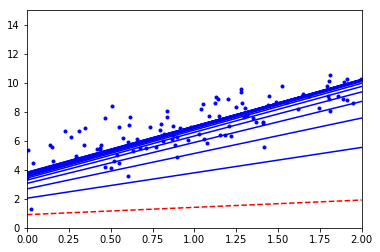

In [38]:
n_epochs = 50
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = X_b[random_index:random_index+1]
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

plt.show()
        

In [39]:
theta

array([[4.44595074],
       [2.64049073]])

In [40]:
from sklearn.linear_model import SGDRegressor

In [42]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=101)

In [46]:
y.shape

(100, 1)

In [45]:
y.ravel().shape

(100,)

In [47]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=101, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [48]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.40666755]), array([2.57997936]))